In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("..\\data\\genus.reabund_complete.csv")
df.head()

,Unnamed: 0,Enterobacteriaceae_unclassified,Dorea,Betaproteobacteria_unclassified,Ruminiclostridium_6,Denitratisoma,Howardella,Selenomonas,Fastidiosipila,Porphyromonadaceae_unclassified,...,Parabacteroides,Selenomonadales_unclassified,Dysgonomonas,Gordonia,Planococcaceae_unclassified,Tyzzerella,Prevotella_9,Lactobacillus,Desulfovibrio,diagnosis
0,1063714,0.157034,0.160174,1.290816,0.000000,0.0,0.0,0.0,0.0,0.384209,...,0.025125,0.0,0.0,0.000000,0.000000,0.000000,10.193570,11.375509,0.112017,1
1,3314627,10.143104,0.393884,1.114063,0.009323,0.0,0.0,0.0,0.0,0.501095,...,0.191115,0.0,0.0,0.000000,0.000000,0.000000,23.798536,0.000000,0.291335,0
2,3940838,1.771959,0.005998,0.123386,0.017137,0.0,0.0,0.0,0.0,0.200502,...,0.244201,0.0,0.0,0.005998,0.026562,0.000000,12.349731,0.038558,0.005998,1
3,4380559,28.060760,0.003138,0.064861,0.000000,0.0,0.0,0.0,0.0,0.008369,...,1.021038,0.0,0.0,0.000000,0.000000,0.024061,0.112984,0.011508,0.000000,0
4,5254362,65.635131,0.000000,0.019221,0.003844,0.0,0.0,0.0,0.0,0.016658,...,0.003844,0.0,0.0,0.000000,0.000000,0.000000,0.421584,7.273286,0.000000,0


In [3]:
# Change col to id
df.rename(columns={"Unnamed: 0":"id"}, inplace=True)
# Set id col to be the index
df.set_index('id', inplace=True)
print(df.shape)
df.head()

(129, 206)


,Enterobacteriaceae_unclassified,Dorea,Betaproteobacteria_unclassified,Ruminiclostridium_6,Denitratisoma,Howardella,Selenomonas,Fastidiosipila,Porphyromonadaceae_unclassified,Clostridiales_unclassified,...,Parabacteroides,Selenomonadales_unclassified,Dysgonomonas,Gordonia,Planococcaceae_unclassified,Tyzzerella,Prevotella_9,Lactobacillus,Desulfovibrio,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
1063714,0.157034,0.160174,1.290816,0.000000,0.0,0.0,0.0,0.0,0.384209,0.097361,...,0.025125,0.0,0.0,0.000000,0.000000,0.000000,10.193570,11.375509,0.112017,1
3314627,10.143104,0.393884,1.114063,0.009323,0.0,0.0,0.0,0.0,0.501095,0.414860,...,0.191115,0.0,0.0,0.000000,0.000000,0.000000,23.798536,0.000000,0.291335,0
3940838,1.771959,0.005998,0.123386,0.017137,0.0,0.0,0.0,0.0,0.200502,0.289614,...,0.244201,0.0,0.0,0.005998,0.026562,0.000000,12.349731,0.038558,0.005998,1
4380559,28.060760,0.003138,0.064861,0.000000,0.0,0.0,0.0,0.0,0.008369,0.047077,...,1.021038,0.0,0.0,0.000000,0.000000,0.024061,0.112984,0.011508,0.000000,0
5254362,65.635131,0.000000,0.019221,0.003844,0.0,0.0,0.0,0.0,0.016658,0.008970,...,0.003844,0.0,0.0,0.000000,0.000000,0.000000,0.421584,7.273286,0.000000,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Feature Selection

In [5]:
cor = df.corr()

# correlation with output variable
feature_cor = abs(cor['diagnosis'])

# select features with a correlation between 0.12 and 0.22
for cor_target in np.arange(.12, .24, .02):
    relevant_features = feature_cor[feature_cor > cor_target]
    print(f"Features with correlation > {cor_target:.2f}: {len(relevant_features)}")
    
    df_ = df[relevant_features.index]
    print(df_.shape)
    df_.to_csv(f"..\\data\\genus.reabund_feature_selected\\{cor_target:.2f}_{len(relevant_features)}.csv")

Features with correlation > 0.12: 62
(129, 62)
Features with correlation > 0.14: 33
(129, 33)
Features with correlation > 0.16: 22
(129, 22)
Features with correlation > 0.18: 12
(129, 12)
Features with correlation > 0.20: 8
(129, 8)
Features with correlation > 0.22: 3
(129, 3)


## Build the model

In [6]:
# split train test data
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df['diagnosis'], 
                                                    test_size=.25)

print(f"""Features: {df.iloc[:,:-1].shape}
      train features: {x_train.shape}
      test features: {x_test.shape}""")

print(f"""Classes: {df['diagnosis'].shape}
      train classes: {y_train.shape}
      test classes: {y_test.shape}""" )

Features: (129, 205)
      train features: (96, 205)
      test features: (33, 205)
Classes: (129,)
      train classes: (96,)
      test classes: (33,)


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# output of GridSearch
def gridSearch_results(model):
    return f"""Best params: {model.best_params_}
Test set score: {model.score(x_test, y_test): .3f}
Best score on train set: {model.best_score_: .3f}"""

# plot the confusion matrix
def plot_cm(cm, ax, title="Default"):
    
    # plot the confusion matrix
    sns.heatmap(cm,
                annot=True,
                linewidths=5,
                cbar=False,
                xticklabels=["control","cvd"],
                yticklabels=["control","cvd"],
                cmap="Blues",
                ax=ax)
    
    ax.title.set_text(f"Confusion Matrix - {title}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Acutal Label")

# plot the roc curve
def plot_roc(prediction, ax, title="Default"):
    
    # plot the roc curve
    fpr, tpr, threshold = roc_curve(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    ax.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    ax.title.set_text(f"ROC Curve - {title}")
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.title.set_text(f"ROC Curve - {title}")
    ax.plot([0, 1], [0, 1], 'r--', label="Random Guess") # Random Guess
    ax.legend()
    ax.grid(alpha=.2)

## AdaBoost

In [8]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [9]:
abc_params = {'n_estimators': range(60, 70),
              'algorithm': ('SAMME', 'SAMME.R'),
              'learning_rate': np.arange(.4, 1.6, .2)
             }

abc = GridSearchCV(ABC(),
                   abc_params,
                   scoring='roc_auc',
                   cv=3,
                   iid=False,
                   n_jobs=-1)

abc.fit(x_train, y_train);

In [10]:
print(gridSearch_results(abc))

Best params: {'algorithm': 'SAMME', 'learning_rate': 1.4000000000000004, 'n_estimators': 69}
Test set score:  0.613
Best score on train set:  0.678


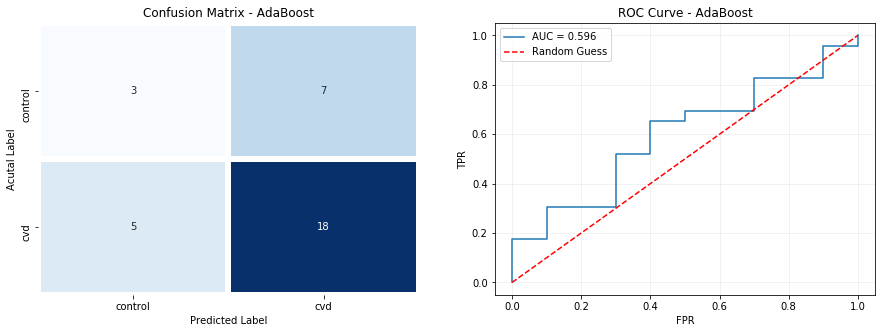

In [11]:
ab_pred = abc.predict(x_test)
ab_pred_prob = abc.predict_proba(x_test)[:,1]

ab_cm = confusion_matrix(y_test, ab_pred)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_cm(ab_cm, axes[0], title="AdaBoost")
plot_roc(ab_pred_prob, axes[1], title="AdaBoost")